In [3]:
import xml.etree.ElementTree as ET

def load_xml_annotations(filename):
    tree = ET.parse(filename)
    root = tree.getroot()
    annotations = []

    for member in root.findall('.//object'):
        bndbox = member.find('bndbox')
        details = {
            'label': member.find('name').text,
            'xmin': int(bndbox.find('xmin').text),
            'ymin': int(bndbox.find('ymin').text),
            'xmax': int(bndbox.find('xmax').text),
            'ymax': int(bndbox.find('ymax').text)
        }
        annotations.append(details)

    return annotations

# Example usage:
annotations = load_xml_annotations('../../data/annots/00001.xml')
print(annotations)


[{'label': 'disease', 'xmin': 173, 'ymin': 16, 'xmax': 184, 'ymax': 26}, {'label': 'disease', 'xmin': 206, 'ymin': 34, 'xmax': 213, 'ymax': 44}, {'label': 'disease', 'xmin': 195, 'ymin': 42, 'xmax': 204, 'ymax': 55}, {'label': 'disease', 'xmin': 59, 'ymin': 47, 'xmax': 72, 'ymax': 58}, {'label': 'disease', 'xmin': 183, 'ymin': 47, 'xmax': 193, 'ymax': 56}, {'label': 'disease', 'xmin': 221, 'ymin': 53, 'xmax': 228, 'ymax': 60}, {'label': 'disease', 'xmin': 78, 'ymin': 59, 'xmax': 89, 'ymax': 82}, {'label': 'disease', 'xmin': 163, 'ymin': 60, 'xmax': 177, 'ymax': 72}, {'label': 'disease', 'xmin': 218, 'ymin': 63, 'xmax': 235, 'ymax': 80}, {'label': 'disease', 'xmin': 194, 'ymin': 66, 'xmax': 203, 'ymax': 73}, {'label': 'disease', 'xmin': 148, 'ymin': 78, 'xmax': 196, 'ymax': 120}, {'label': 'disease', 'xmin': 240, 'ymin': 78, 'xmax': 244, 'ymax': 84}, {'label': 'disease', 'xmin': 114, 'ymin': 84, 'xmax': 127, 'ymax': 94}, {'label': 'disease', 'xmin': 255, 'ymin': 89, 'xmax': 264, 'ymax':

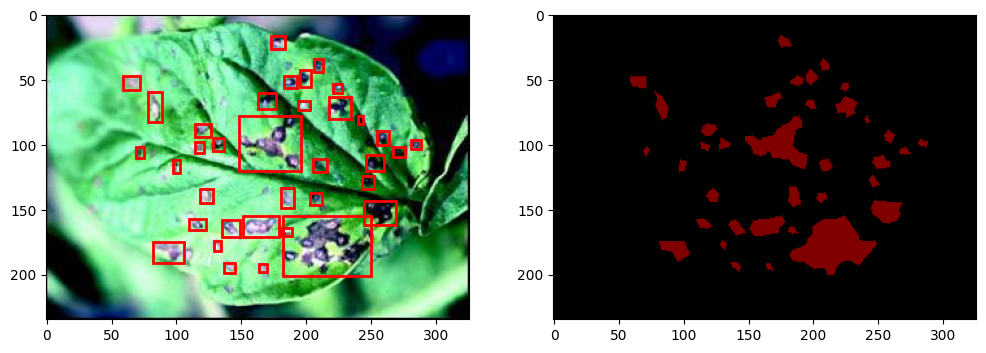

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io

def display_image_mask_annotations(image_path, mask_path, annotations):
    image = skimage.io.imread(image_path)
    mask = skimage.io.imread(mask_path)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[1].imshow(mask, cmap='gray')
    
    for ann in annotations:
        rect = patches.Rectangle((ann['xmin'], ann['ymin']), ann['xmax'] - ann['xmin'], ann['ymax'] - ann['ymin'], linewidth=2, edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)
    
    plt.show()

# Example usage:
display_image_mask_annotations('../../data/images/00001.jpg', '../../data/masks/00001.png', annotations)
